# Importing Libraries

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, silhouette_score

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/leenaali1114/House-Price-Dataset/main/HousePrice.csv")

In [3]:
df.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [4]:
df.shape

(500000, 16)

# Exploring Data 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


In [6]:
df.isna().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

In [7]:
df.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


In [8]:
df['City'].unique()

array([3, 2, 1], dtype=int64)

In [9]:
df.corr()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.000000,-0.000897,0.000374,-0.000398,0.002525,-0.001477,-0.001047,-0.000776,-0.003455,0.000526,-0.000128,0.000114,-0.001230,0.000610,0.001428,0.147717
Garage,-0.000897,1.000000,0.001307,-0.003647,0.000541,0.001847,-0.002385,-0.000931,0.000793,0.001480,0.000779,-0.000562,-0.002171,0.001088,-0.000669,0.100294
FirePlace,0.000374,0.001307,1.000000,0.000643,0.000952,-0.000922,-0.000030,0.000185,-0.000211,-0.000309,0.001342,0.001818,-0.000366,0.001295,0.000231,0.089139
Baths,-0.000398,-0.003647,0.000643,1.000000,0.002493,-0.002739,0.000246,-0.000880,-0.000858,-0.000755,0.001047,-0.000687,-0.001668,0.002212,0.001723,0.145087
White Marble,0.002525,0.000541,0.000952,0.002493,1.000000,-0.498893,-0.500723,0.000078,-0.000861,-0.001583,0.000558,-0.000576,-0.000402,-0.001898,0.000959,0.448154
Black Marble,-0.001477,0.001847,-0.000922,-0.002739,-0.498893,1.000000,-0.500383,-0.000368,-0.000324,0.001764,-0.000549,0.000073,0.000086,0.000713,0.000133,-0.078049
Indian Marble,-0.001047,-0.002385,-0.000030,0.000246,-0.500723,-0.500383,1.000000,0.000289,0.001184,-0.000180,-0.000010,0.000503,0.000316,0.001184,-0.001091,-0.369756
Floors,-0.000776,-0.000931,0.000185,-0.000880,0.000078,-0.000368,0.000289,1.000000,-0.000641,-0.002651,0.000082,0.001373,-0.000008,-0.000211,-0.000492,0.619451
City,-0.003455,0.000793,-0.000211,-0.000858,-0.000861,-0.000324,0.001184,-0.000641,1.000000,0.000488,0.000788,-0.002716,0.000770,0.000322,0.001207,0.233259
Solar,0.000526,0.001480,-0.000309,-0.000755,-0.001583,0.001764,-0.000180,-0.002651,0.000488,1.000000,0.001883,0.000238,-0.000817,-0.000466,-0.004263,0.008429


In [10]:
# commented for speed

# for col in df.columns:
#     plt.hist(df[col])
#     plt.show()

In [11]:
# for col in df.columns:
#     sns.barplot(data=df, x = col, y=df['Prices'],ci=None)
#     plt.show()

In [12]:
# for col in df.columns:
#     if col == "Prices":
#         break
#     sns.displot(df, x=df[col], hue="City", kind="kde", palette="plasma", fill=True,  height=3, aspect=1.5)
# plt.show()

In [13]:
# 20+ mins

# sns.set_style("whitegrid")
# sns.pairplot(df, hue="City", height=2)
# plt.show()

In [14]:
df.groupby('City').size()

City
1    166314
2    166902
3    166784
dtype: int64

# Separating features for prediction

In [15]:
x=df.drop(['City'],axis=1)
y=df['City']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [17]:
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (350000, 15)
y_train:  (350000,)
x_test:  (150000, 15)
y_test:  (150000,)


# Logistric Regression

In [18]:
model_lr = LogisticRegression(max_iter = 600)

In [19]:
model_lr.fit(x_train,y_train)

LogisticRegression(max_iter=600)

In [20]:
y_lr_pred=model_lr.predict(x_test)

In [21]:
print("Accuracy : ", accuracy_score(y_test, y_lr_pred))

Accuracy :  0.36989333333333335


# K Neighbours Classifier

In [22]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()

In [23]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
y_knn_pred = model_knn.predict(x_test)

In [25]:
print("Accuracy : ", accuracy_score(y_test, y_knn_pred))

Accuracy :  0.38914666666666664


# Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_ds=DecisionTreeClassifier()

In [27]:
model_ds.fit(x_train,y_train)

DecisionTreeClassifier()

In [28]:
y_ds_pred=model_ds.predict(x_test)

In [29]:
print("Accuracy : ", accuracy_score(y_test, y_ds_pred))

Accuracy :  0.9427733333333334


# Support Vector Machine
*Too long to run

In [30]:
# from sklearn.svm import SVC
# model_svc = SVC(gamma='auto')

In [31]:
# SVC hates me

# model_svc.fit(x_train,y_train)

In [32]:
# y_svc_pred=model_svc.predict(x_test)

In [33]:
# print("Accuracy : ", accuracy_score(y_test, y_svc_pred))

# Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators = 30, criterion = 'entropy', random_state = 0)

In [35]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30, random_state=0)

In [36]:
y_rf_pred = model_rf.predict(x_test)

In [37]:
print("Accuracy : ", accuracy_score(y_test, y_rf_pred))

Accuracy :  0.9756133333333333


# Using RF Classifier with 97% acc

In [38]:
Xnew = [[169, 2, 1, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 62700]]

ynew = model_rf.predict(Xnew)

print(ynew)

[3]


# K Means  Clustering

In [39]:
features=['Area', 'Prices']
X=df[features]

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
wcss = {'wcss_score':[], 'no_of_clusters':[]}
for i in range(1,11):
    kmeans = KMeans(i, random_state=0)
    kmeans.fit(X_scaled)
    wcss['wcss_score'].append(kmeans.inertia_)
    wcss['no_of_clusters'].append(i)
wcss_df = pd.DataFrame(wcss)

wcss_df.head(15)

,wcss_score,no_of_clusters
0,1000000.000000,1
1,603000.602600,2
2,410128.982240,3
3,284988.552162,4
4,243355.903396,5
5,204182.853875,6
6,171851.021155,7
7,151136.133085,8
8,134817.310124,9
9,121186.393642,10


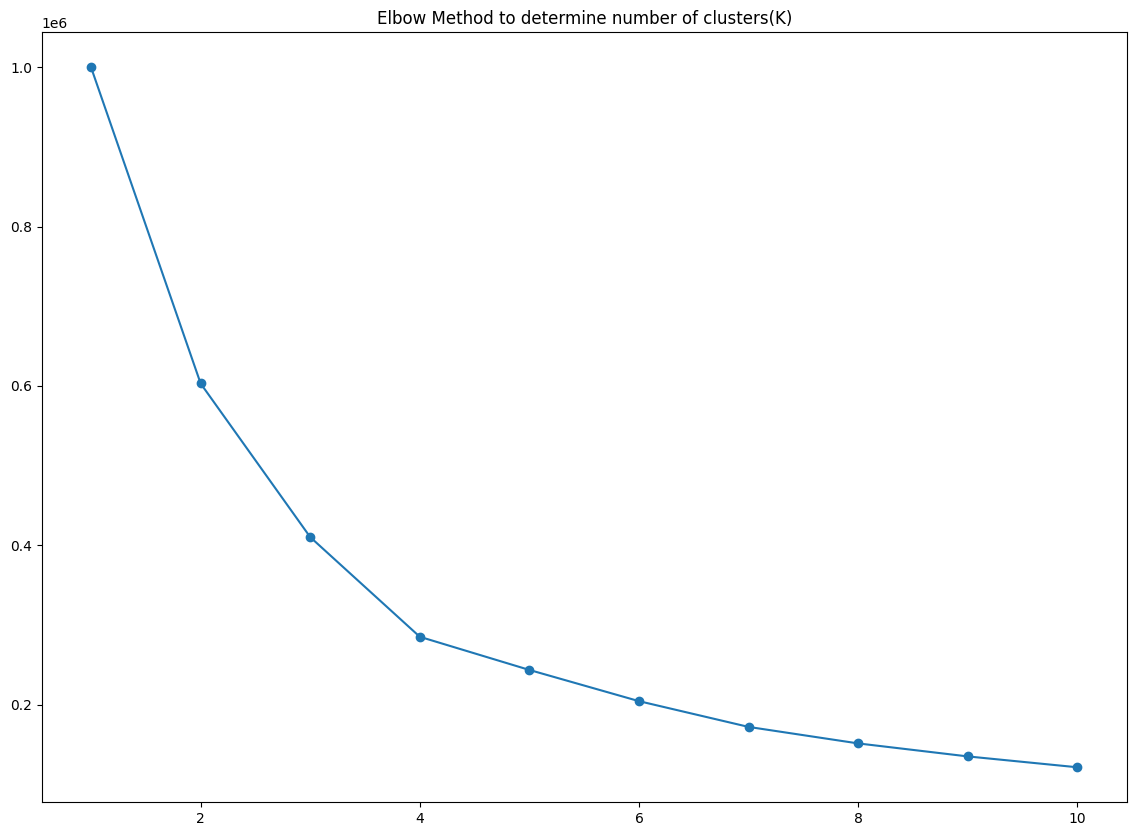

In [42]:
plt.figure(figsize=(14,10))
plt.plot(wcss_df.no_of_clusters, wcss_df.wcss_score, marker='o')
plt.title("Elbow Method to determine number of clusters(K)")
plt.show()

In [43]:
kmeans=KMeans(n_clusters=3,random_state=0) 
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [44]:
prediction=kmeans.fit_predict(X_scaled)
prediction

array([0, 1, 2, ..., 2, 2, 1])

In [45]:
sel_feature = ['Area', 'Prices', 'City']
clustered_data = df[sel_feature]
clustered_data["cluster_index"] = prediction

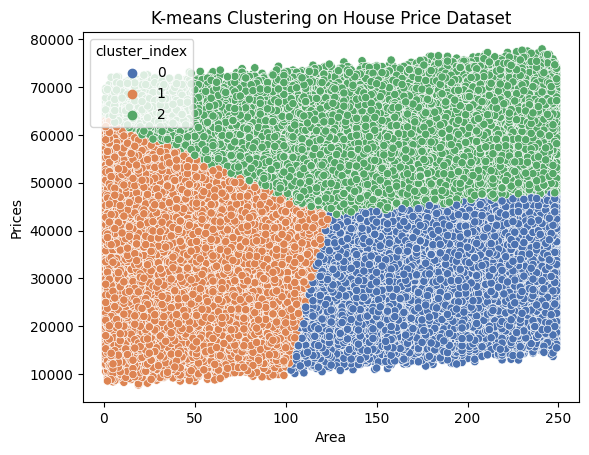

In [46]:
sns.scatterplot(data=clustered_data, 
                x=clustered_data.Area, 
                y=clustered_data.Prices, 
                hue=clustered_data.cluster_index, 
                palette='deep')

plt.title('K-means Clustering on House Price Dataset')
plt.xlabel('Area')
plt.ylabel('Prices')

plt.show()

In [47]:
# score = silhouette_score(df, clustered_data.cluster_index, random_state=0)
# print(f"Silhouette score: {score:0.3f}")

# Linear Regression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [49]:
reg_X = df.drop(['Prices','FirePlace','Black Marble','Indian Marble'], axis=1)
reg_Y = df['Prices']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(reg_X, reg_Y, test_size=0.2, random_state=0)

In [51]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor

LinearRegression()

In [52]:
regressor.fit(X_train,y_train)

LinearRegression()

In [53]:
y_pred=regressor.predict(X_test)

In [54]:
y_pred_train=regressor.predict(X_train)

In [58]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 1965.7215248020368
Mean Squared Error: 5288495.102237157
Root Mean Squared Error: 2299.6728250421093
